In [78]:
import pandas as pd
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# input parameters
Sigma = np.array([[1, -0.8], [-0.8, 2]]) # Covariance matrix of the Bivariate Normal distribution
c = np.sqrt(Sigma[1, 1] - Sigma[1, 0] * 1/(Sigma[0, 0]) * Sigma[0, 1]) # SD of conditional f(X2|X1)

# Create grid for x1,x2 and compute conditional pdf
x1 = np.ravel([np.arange(0, 4.51, 0.75)]*301) # grid values for x1\t\t
x2 = np.repeat(np.arange(-10, 5.01, 0.05), len(np.unique(x1))) # grid values for x2
f = norm.pdf(0, (x2 - Sigma[0, 0]/Sigma[0, 1] * x1)/c, 1)/c # conditional pdf f(X2|X1)
xx1 = pd.DataFrame(data = {"x1":x1,"x2": x2,"f": f}, columns = ["x1", "x2", "f"])

# Conditional means
xm  = np.unique(x1) # realized x1
m = pd.DataFrame(data = {"xm": xm, "1": Sigma[1, 0] * xm, "2": [0]*len(xm)}, columns = ["xm", "1", "2"]) # conditional mean
xmf = [-2] + list(xm) + [6]

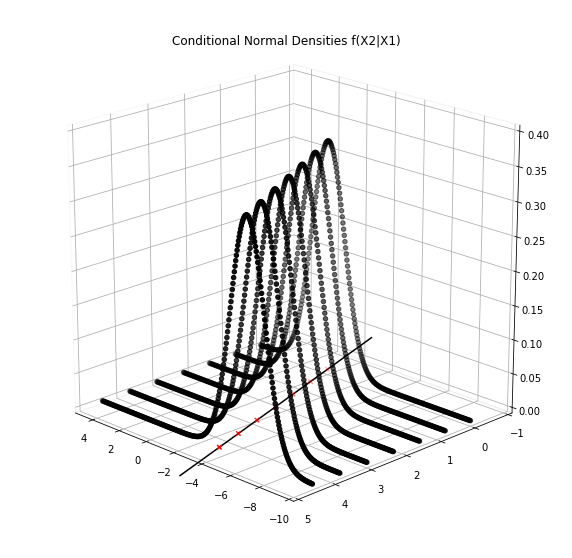

In [116]:
# plot: shifts in the conditional density
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(xx1.iloc[:, 1], xx1.iloc[:, 0], xx1.iloc[:, 2], c = "black", edgecolors = "black")
ax.scatter(m.iloc[:, 1], m.iloc[:, 0], m.iloc[:, 2], marker = "x", c = "r")
ax.plot(Sigma[1, 0] * np.array(xmf), np.array(xmf), [0]*9, c = "black")
ax.view_init(20, 135)

ax.set_xlim(-10, 5)
ax.set_ylim(-1, 5)
ax.set_zlim(0, 0.4)

ax.xaxis.pane.fill = False
ax.yaxis.pane.fill = False
ax.zaxis.pane.fill = False

plt.title("Conditional Normal Densities f(X2|X1)")
    
plt.show()